In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

In [64]:
# Baca dataset
dataset = pd.read_csv('Airlines.csv')

In [65]:
# Tentukan X (fitur) dan Y (label)
X = dataset[['Airline', 'Time', 'Length']]
Y = dataset['Delay']

In [66]:
# Lakukan encoding untuk atribut kategorikal
encoder = LabelEncoder()
X['Airline'] = encoder.fit_transform(X['Airline'])

C:\Users\Fasa\AppData\Local\Temp\ipykernel_13132\2754900282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Airline'] = encoder.fit_transform(X['Airline'])


In [67]:
# Split dataset menjadi data pelatihan dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [78]:
# Membangun model klasifikasi biner
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))  # Output layer untuk klasifikasi biner
])

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
# Pelatihan model
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
13485/13485 [==============================] - 25s 2ms/step - loss: 0.6728 - accuracy: 0.5683 - val_loss: 0.6722 - val_accuracy: 0.5727
Epoch 2/50
13485/13485 [==============================] - 23s 2ms/step - loss: 0.6728 - accuracy: 0.5686 - val_loss: 0.6711 - val_accuracy: 0.5706
Epoch 3/50
13485/13485 [==============================] - 24s 2ms/step - loss: 0.6727 - accuracy: 0.5688 - val_loss: 0.6735 - val_accuracy: 0.5655
Epoch 4/50
13485/13485 [==============================] - 20s 1ms/step - loss: 0.6728 - accuracy: 0.5685 - val_loss: 0.6720 - val_accuracy: 0.5698
Epoch 5/50
13485/13485 [==============================] - 20s 1ms/step - loss: 0.6727 - accuracy: 0.5684 - val_loss: 0.6709 - val_accuracy: 0.5708
Epoch 6/50
13485/13485 [==============================] - 20s 1ms/step - loss: 0.6728 - accuracy: 0.5683 - val_loss: 0.6719 - val_accuracy: 0.5715
Epoch 7/50
13485/13485 [==============================] - 20s 1ms/step - loss: 0.6727 - accuracy: 0.5687 - val_loss: 0

In [89]:
# Evaluasi model pada data uji
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6721010208129883
Test accuracy: 0.5717622637748718


In [84]:
# Ambil data akurasi dan loss selama pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

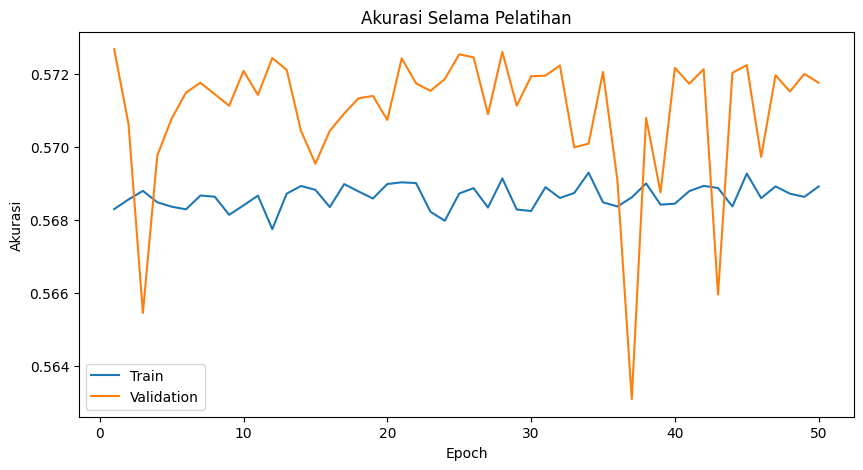

In [85]:
# Plot akurasi
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation')
plt.title('Akurasi Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

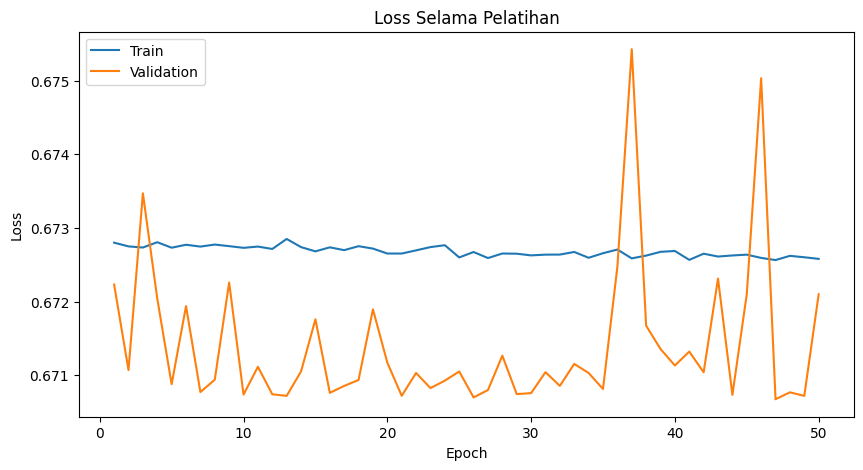

In [86]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation')
plt.title('Loss Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
# Simpan model
model.save('model_posttest6.h5')

c:\Users\Fasa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
